In [1]:
import pandas as pd

In [2]:
drink = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/principles_of_data_science/master/data/chapter_2/drinks.csv')
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
drink.to_csv('drink.csv')

In [4]:
drink.shape

(193, 6)

In [5]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [9]:
X = beer.drop('name', axis=1)
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [12]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [13]:
beer['cluster'] = km.labels_
beer.head()

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0


In [15]:
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


In [16]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [17]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()

In [20]:
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [21]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

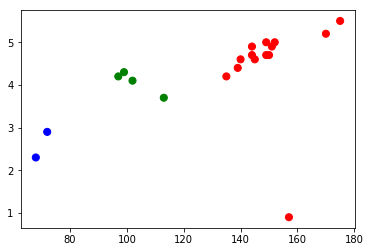

In [22]:
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

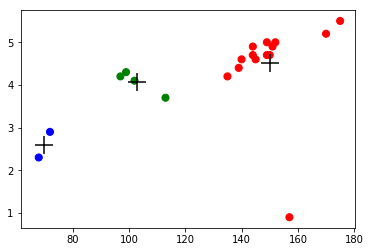

In [23]:
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s= 300, c='black')

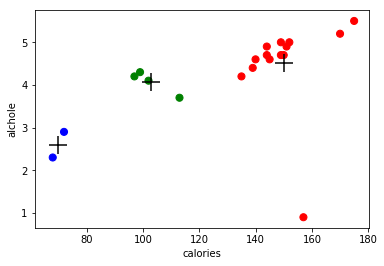

In [25]:
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s= 300, c='black')

plt.xlabel('calories')
plt.ylabel('alchole')

plt.show()

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240BE44D9E8>,
      dtype=object)

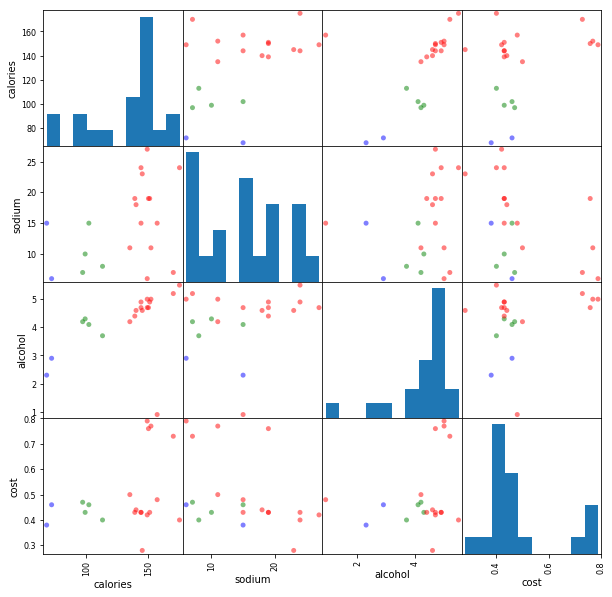

In [29]:
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

## 데이터 전처리

In [32]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.38791334  0.00779468  0.43380786 -0.45682969]
 [ 0.6250656   0.63136906  0.62241997 -0.45682969]
 [ 0.82833896  0.00779468 -3.14982226 -0.10269815]
 [ 1.26876459 -1.23935408  0.90533814  1.66795955]
 [ 0.65894449 -0.6157797   0.71672602  1.95126478]
 [ 0.42179223  1.25494344  0.3395018  -1.5192243 ]
 [ 1.43815906  1.41083704  1.1882563  -0.66930861]
 [ 0.55730781  1.87851782  0.43380786 -0.52765599]
 [-1.1366369  -0.7716733   0.05658363 -0.45682969]
 [-0.66233238 -1.08346049 -0.5092527  -0.66930861]
 [ 0.25239776  0.47547547  0.3395018  -0.38600338]
 [-1.03500022  0.00779468 -0.13202848 -0.24435076]
 [ 0.08300329 -0.6157797  -0.03772242  0.03895447]
 [ 0.59118671  0.63136906  0.43380786  1.88043848]
 [ 0.55730781 -1.39524768  0.71672602  2.0929174 ]
 [-2.18688263  0.00779468 -1.82953748 -0.81096123]
 [ 0.21851887  0.63136906  0.15088969 -0.45682969]
 [ 0.38791334  1.41083704  0.62241997 -0.45682969]
 [-2.05136705 -1.39524768 -1.26370115 -0.24435076]
 [-1.20439469 -1.23935408 -0.03

In [34]:

# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [36]:
# save the cluster labels and sort by cluster# save t 
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


In [37]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240BE5BB748>,
      dtype=object)

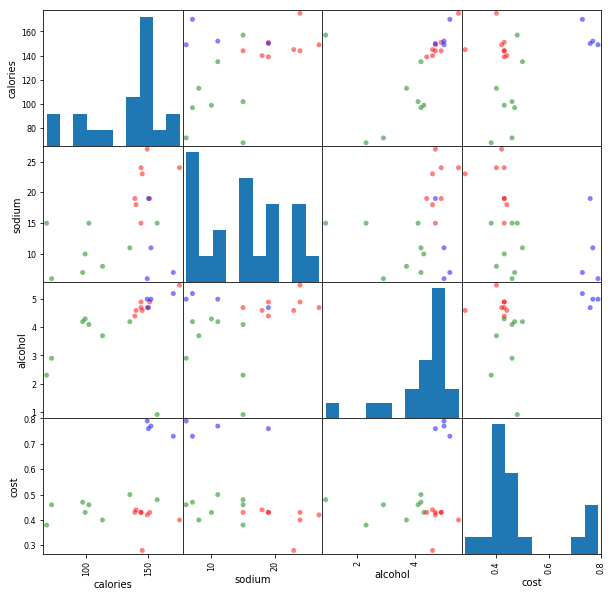

In [38]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

## Clustering은 클러스터가 발견됐다는 것만 알 수 있고 클러스터의 의미를 알 수 없음

In [26]:
from sklearn import metrics

In [27]:
metrics.silhouette_score(X, km.labels_)

0.6731775046455796

In [39]:
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [40]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

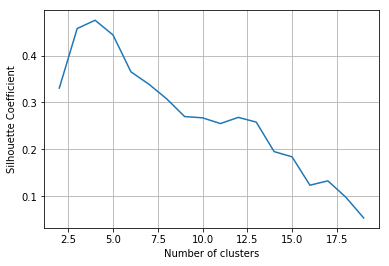

In [41]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### 그래프의 결과로 보면 4정도가 적합한 클러스터 계수로 보인다.
- 4가지의 독특한 타입의 맥주가 있다라고 판단 가능하다.